In [12]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

House = fetch_california_housing()

In [13]:
print(House.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [14]:
#print(House.data.shape)
#print(House.target.shape)

In [15]:
#House.feature_names

In [16]:
House_df = pd.DataFrame(House.data,
                        columns=House.feature_names)
House_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


<Axes: xlabel='Longitude', ylabel='Latitude'>

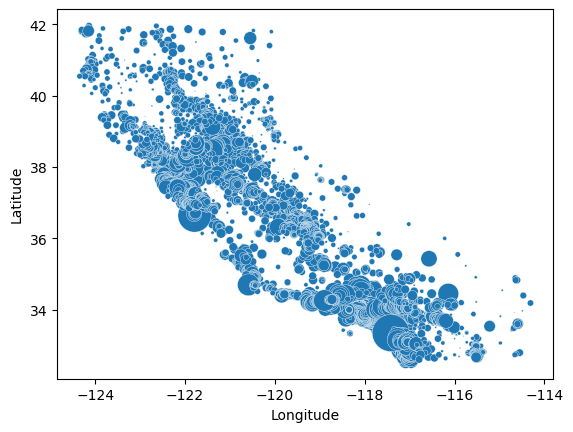

In [17]:
sns.scatterplot(x=House_df['Longitude'], y=House_df['Latitude'],
               s=House_df['Population']/50)

In [18]:
House_df['MedHouseValue']= pd.Series(House.target)

In [19]:
House_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
House_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [47]:
 upper_array = np.where(House_df['MedHouseValue']>=upper)[0]
lower_array = np.where(House_df['MedHouseValue']<=lower)[0]
 
# Removing the outliers
House_df.drop(index=upper_array, inplace=True)
House_df.drop(index=lower_array, inplace=True)
 
print("New Shape: ", House_df.shape)

New Shape:  (19569, 9)


In [ ]:
corr=House_df.corr()

In [ ]:
Correlation_MHV=corr['MedHouseValue']
Correlation_MHV

In [ ]:
Correlation_MHV.plot.bar(x='MedHouseValue')

In [ ]:
def correlation(df, threshold):
    correlated_cols= set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols            

In [ ]:
corr_features=correlation(X_train, 0.8)

In [ ]:
House_df

In [ ]:
House_df.hist(bins=50, figsize=(15,10))

In [27]:
X_train,X_test,y_train,y_test= train_test_split(House_df.drop(['MedHouseValue'],axis=1),
                                               House_df['MedHouseValue'],
                                                random_state=11)

In [28]:
#X_train.drop(labels=corr_features,axis=1,inplace=True)
#X_test.drop(labels=corr_features,axis=1,inplace=True)

In [29]:
print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [30]:
linear_regression=LinearRegression()
linear_regression.fit(X=X_train,y=y_train)

for i,name in enumerate(House.feature_names):
     print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.43770302153822116
  HouseAge: 0.009216834565797858
  AveRooms: -0.10732526637361005
 AveBedrms: 0.6117133073918092
Population: -5.756822009278575e-06
  AveOccup: -0.003384566465716366
  Latitude: -0.4194818609649059
 Longitude: -0.4337713349874005


In [31]:
#sns.scatterplot(x=House_df['MedInc'],y=House_df['MedHouseValue'])
#sns.scatterplot(x=House_df['HouseAge'],y=House_df['MedHouseValue'])
#sns.scatterplot(x=House_df['Population'],y=House_df['MedHouseValue'])
#sns.scatterplot(x=House_df['AveOccup'],y=House_df['MedHouseValue'])

In [32]:
vif=[]
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))

In [33]:
pd.DataFrame({'vif':vif}, index=House_df.columns[0:8]).T

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
vif,11.588407,7.194179,46.802281,42.41671,2.855324,1.076928,565.844509,637.35136


<Axes: >

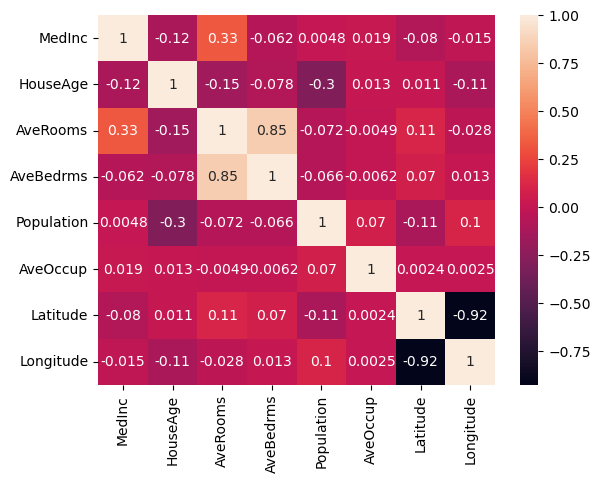

In [34]:
sns.heatmap(House_df.iloc[:,0:8].corr(),annot=True)

In [35]:
print(linear_regression.intercept_)

-36.88295065605553


In [36]:
predicted = linear_regression.predict(X_test)
expected = y_test


<Axes: xlabel='Expected', ylabel='Predicted'>

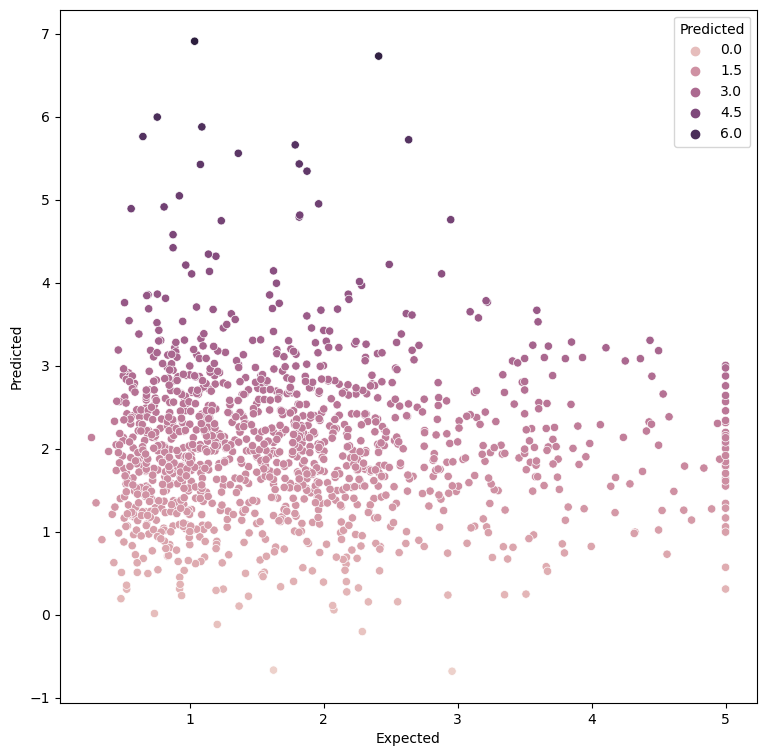

In [37]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
figure = plt.figure(figsize=(9, 9))
sns.scatterplot(data=df, x='Expected', y='Predicted',hue='Predicted')

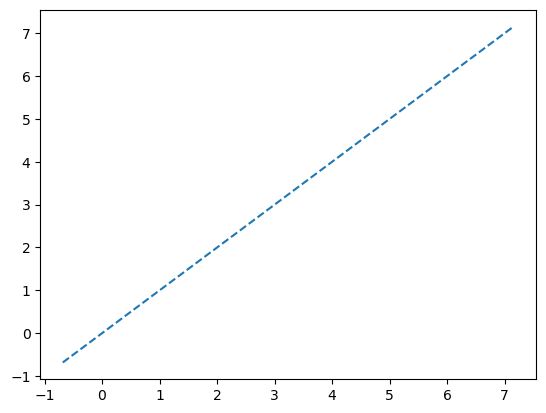

In [38]:
start= min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

line = plt.plot([start, end], [start, end], '--')

In [39]:
print(f'The R2 score: {metrics.r2_score(expected, predicted)}\n')
print(f'The MSE: {metrics.mean_squared_error(expected, predicted)}')

The R2 score: 0.6008983115964299

The MSE: 0.5350149774449162


In [40]:
residue= predicted-expected

C:\Users\atharva.sharma\AppData\Local\Temp\ipykernel_16880\102571781.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residue)


<Axes: xlabel='MedHouseValue', ylabel='Density'>

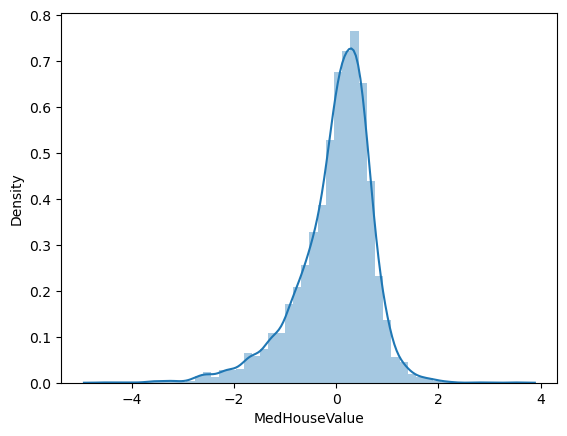

In [41]:
sns.distplot(residue)

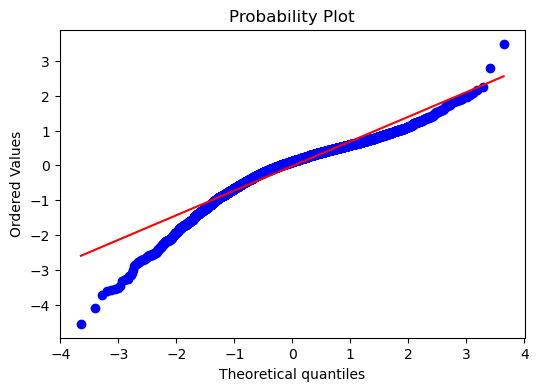

In [42]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residue, plot=ax, fit=True)
plt.show()
#errors are not normally distributed

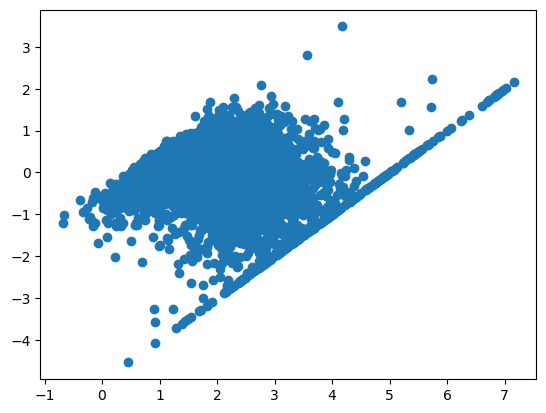

In [43]:
plt.scatter(predicted,residue)

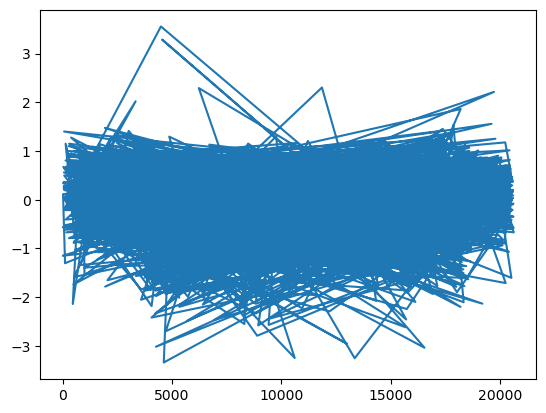

In [443]:
plt.plot(residue)

In [445]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [446]:
House_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,3.665568,28.352752,5.357548,1.096695,1442.788952,3.098760,35.654159,-119.562786,1.908523
std,1.557927,12.497772,2.294996,0.452836,1145.011369,10.660526,2.151007,2.005764,0.954386
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.522700,18.000000,4.413567,1.005894,797.000000,2.448193,33.930000,-121.760000,1.162000
50%,3.441200,28.000000,5.181818,1.048588,1181.000000,2.839009,34.270000,-118.510000,1.732000
75%,4.572100,37.000000,5.965142,1.099363,1749.000000,3.307692,37.730000,-117.990000,2.467000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,4.822000


In [45]:
IQR=2.647-1.196
upper=(1.5*IQR)+2.647
lower=1.196-(1.5*IQR)

In [46]:
print(upper)
print(lower)

4.823499999999999
-0.9804999999999999
